In [9]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

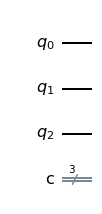

In [10]:
qc = QuantumCircuit(3, 3) # Quantum circuit with 3 qubits and 3 classical bits

qc.draw('mpl')

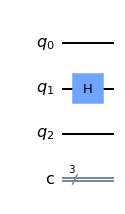

In [11]:
qc.h(1)
qc.draw('mpl')

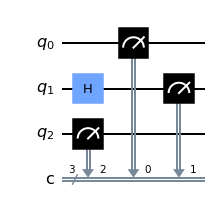

In [14]:
qc.measure(range(3), range(3))
qc.draw('mpl')

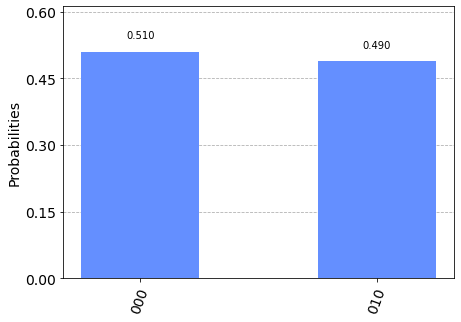

In [15]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)

# CNOT Gate

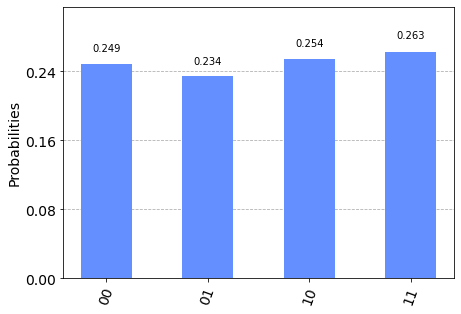

In [16]:
# Creating the circuit
cx_demo = QuantumCircuit(2, 2)
cx_demo.h(range(2))
cx_demo.cx(0, 1)
cx_demo.measure(range(2), range(2))

# Simulation and visualization
counts_cx = execute(cx_demo, backend).result().get_counts()
plot_histogram(counts_cx)

# CCNOT Gate

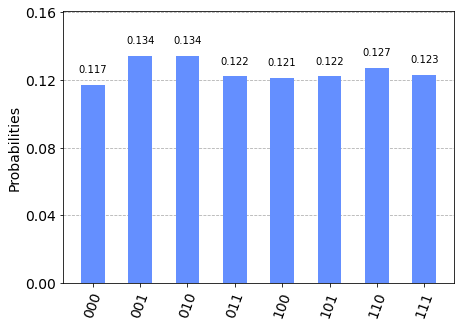

In [18]:
# Creating the circuit
ccx_demo = QuantumCircuit(3, 3)
ccx_demo.h(range(3))
ccx_demo.ccx(0, 1, 2)
ccx_demo.measure(range(3), range(3))

# Simulation and visualization
counts_ccx = execute(ccx_demo, backend).result().get_counts()
plot_histogram(counts_ccx)

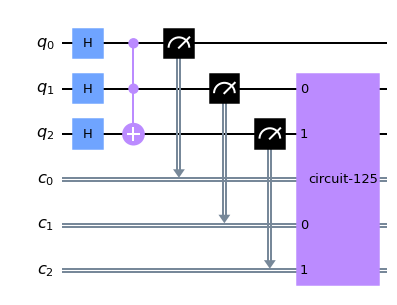

In [19]:
# Append both circuits

ccx_demo.append(cx_demo, [1, 2], [1, 2])
ccx_demo.draw('mpl', cregbundle = False)

In [20]:
# Quantum Registers
a    = QuantumRegister(1, 'a')
b    = QuantumRegister(1, 'b')
cin  = QuantumRegister(1, 'cin')
s    = QuantumRegister(1, 's')
cout = QuantumRegister(1, 'cout')
creg = ClassicalRegister(5, 'creg')

In [21]:
# Quantum Circuit
full_adder = QuantumCircuit()
full_adder.add_register(a)
full_adder.add_register(b)
full_adder.add_register(cin)
full_adder.add_register(s)
full_adder.add_register(cout)
full_adder.add_register(creg)

In [22]:
#Sum
full_adder.cx(a, s)
full_adder.cx(b, s)
full_adder.cx(cin, s)

In [23]:
# Cout
full_adder.ccx(a, b, cout)
full_adder.ccx(b, cin, cout)
full_adder.ccx(a, cin, cout)

In [24]:
def full_adder():
    # Quantum Registers
    a = QuantumRegister(1, 'a')
    b = QuantumRegister(1, 'b')
    cin = QuantumRegister(1, 'cin')
    s = QuantumRegister(1, 's')
    cout = QuantumRegister(1, 'cout')
    creg = ClassicalRegister(5, 'creg')
    # Quantum Circuit
    qc = QuantumCircuit()
    qc.add_register(a)
    qc.add_register(b)
    qc.add_register(cin)
    qc.add_register(s)
    qc.add_register(cout)
    qc.add_register(creg)
    # Sum
    qc.cx(a, s)
    qc.cx(b, s)
    qc.cx(cin, s)
    # Cout
    qc.ccx(a, b, cout)
    qc.ccx(b, cin, cout)
    qc.ccx(a, cin, cout)
    # Return the circuit
    return qc

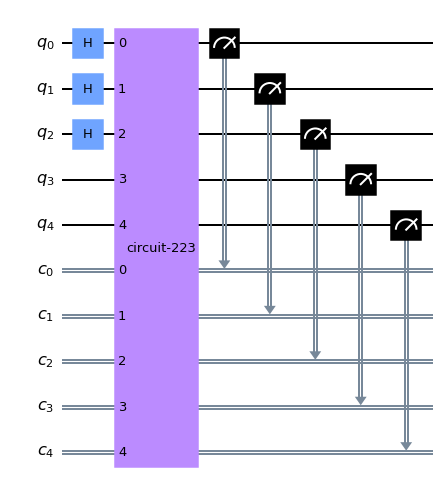

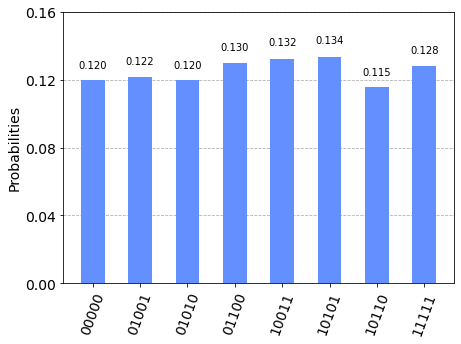

In [25]:
# Create the circuit
adder = QuantumCircuit(5, 5)
adder.h(range(3))
adder.append(full_adder(), range(5), range(5))
adder.measure(range(5), range(5))
display(adder.draw('mpl', cregbundle = False))

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
adder_counts = execute(adder, backend, shots = 4096).result().get_counts()
plot_histogram(adder_counts)

In [26]:
from helper import adder_truth_table
adder_truth_table(adder_counts)

a,b,cin,cout,sum,probability
0,1,0,0,1,0.114
0,0,0,0,0,0.114
1,1,0,1,0,0.140
1,0,0,0,1,0.118
1,0,1,1,0,0.142
1,1,1,1,1,0.131
0,1,1,1,0,0.106
0,0,1,0,1,0.134
